In [1]:
#%run prepare_dataset_PPS_NR.ipynb

In [73]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale, MaxAbsScaler, RobustScaler, QuantileTransformer, Normalizer
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN, KMeans, AffinityPropagation
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import euclidean_distances

from scipy.cluster.hierarchy import dendrogram, linkage, to_tree, inconsistent, maxRstat, cophenet, fcluster
from scipy.special import comb

from seaborn import countplot, pairplot
import seaborn as sns

from matplotlib import pyplot as plt

In [74]:
def q1(x):
    return x.quantile(0.1)

def q3(x):
    return x.quantile(0.9)

def intraclust_dist_mean(df):
    sum_dists = 0
    sum_pairs = 0
    for cluster in df['Кластер'].unique():
        sum_dists += euclidean_distances(df[df['Кластер']==cluster].drop(columns=['Кластер'])).sum()/2
        sum_pairs += comb(df[df['Кластер']==cluster].shape[0], 2)
    return sum_dists / sum_pairs

In [83]:
data = pd.read_excel('общий массив данных ППС 14.01.20.xlsx', sheet_name='Sheet1')
features = [
#    'ФИО',
    'Возраст',
    'Ученая степень',
    'Ученое звание',
    'Внешнее совместительство',
    'Должность',
    'Количество ставок ППС и НР',
    'Количество ставок НЕ ППС и НР',
    'кол-во Иностранных',
    'кол-во Отечественных',
    'Scopus_or_WoS',
    'ВАК',
    'РИНЦ',
    'без статуса',
    'кол-во НЕ в ургупс',
    'кол-во в ургупс',
    'Средний ИмпактФактор',
    'Среднее количество соавторов',
    'Максимальный ИмпактФактор',
    'Время преподавания_окт2019',
    'Время преподавания_ноя2019',
    'Время преподавания_дек2019',
    'Ср продолжительность в УрГУПС_окт2019',
    'Ср продолжительность в УрГУПС_ноя2019',
    'Ср продолжительность в УрГУПС_дек2019',
    'Общая продолжительность в УрГУПС_окт2019',
    'Общая продолжительность в УрГУПС_ноя2019',
    'Общая продолжительность в УрГУПС_дек2019',
    'Кол-во зарубежных командировок',
    'Кол-во командировок в Москву',
    'Кол-во командировок в России (кроме Москвы)',
    'Кол-во конференций НЕ в УрГУПС',
    'Кол-во конференций в УрГУПС'
    ]
data = data[features].dropna(subset=['Возраст'])

data['Ученая степень'] = data['Ученая степень'].map({np.nan: 0, 
                                                         'Кандидат наук': 1, 
                                                         'Доктор наук': 2})
data['Ученое звание'] = data['Ученое звание'].map({np.nan: 0, 
                                                       'Доцент': 1, 
                                                       'Старший научный сотрудник': 1,
                                                       'Профессор': 2})
data['Внешнее совместительство'] = data['Внешнее совместительство'].map({'нет': 0, 
                                                                             'есть_специалист': 1, 
                                                                             'есть_начальник_директор_руководитель': 2})
data['Должность'] = data['Должность'].map({'Ассистент': 0, 
                                               'Преподаватель': 1, 
                                               'Старший преподаватель': 1,
                                               'Руководитель центра': 1,
                                               'Заведующий лабораторией химического анализа': 1,
                                               'Доцент': 2,
                                               'Декан факультета': 2,
                                               'Ведущий научный сотрудник': 2,
                                               'Профессор': 3, 
                                               'Главный научный сотрудник ': 3})
data = data.fillna(0)

data['Время преподавания'] = (data['Время преподавания_окт2019'] + data['Время преподавания_ноя2019'] + data['Время преподавания_дек2019'])
data['Ср продолжительность в УрГУПС'] = (data['Ср продолжительность в УрГУПС_окт2019'] + data['Ср продолжительность в УрГУПС_ноя2019'] + data['Ср продолжительность в УрГУПС_дек2019']) / 3
data['Общая продолжительность в УрГУПС'] = (data['Общая продолжительность в УрГУПС_окт2019'] + data['Общая продолжительность в УрГУПС_окт2019'] + data['Общая продолжительность в УрГУПС_окт2019'])

features = [
#    'ФИО',
    'Возраст',
    'Ученая степень',
    'Ученое звание',
    'Внешнее совместительство',
    'Должность',
    'Количество ставок ППС и НР',
    'Количество ставок НЕ ППС и НР',
    'кол-во Иностранных',
    'кол-во Отечественных',
    'Scopus_or_WoS',
    'ВАК',
    'РИНЦ',
    'без статуса',
    'кол-во НЕ в ургупс',
    'кол-во в ургупс',
    'Средний ИмпактФактор',
    'Среднее количество соавторов',
    'Максимальный ИмпактФактор',
    'Время преподавания',
    'Ср продолжительность в УрГУПС',
    'Общая продолжительность в УрГУПС',
    'Кол-во зарубежных командировок',
    'Кол-во командировок в Москву',
    'Кол-во командировок в России (кроме Москвы)',
    'Кол-во конференций НЕ в УрГУПС',
    'Кол-во конференций в УрГУПС'
    ]
data = data[features]

In [85]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)

<font size="6">Иерархическая и К-средних кластеризация</font>

In [86]:
Z = linkage(data, method='ward')
mean_dists = []
for num_clusters in range(30, 1, -1):
    hierarchical_clusters = fcluster(Z, num_clusters, criterion='maxclust')
    data['Кластер'] = pd.Series(hierarchical_clusters, index=data.index)
    centers = data.groupby(['Кластер']).mean()
    data = data.drop(columns=['Кластер'])
    Kmean_clust = KMeans(n_clusters=num_clusters, init=centers, n_init=1).fit(data)
    Kmeans_clusters = Kmean_clust.labels_ + 1
    data['Кластер'] = pd.Series(Kmeans_clusters, index=data.index)
    dist = intraclust_dist_mean(data)
    mean_dists.append(dist)
    data = data.drop(columns=['Кластер'])
    print('кол-кластеров', str(num_clusters), '\t|', 'ср. внутрикласт. расст.', str(dist))

кол-кластеров 30 	| ср. внутрикласт. расст. 0.7139317915901234
кол-кластеров 29 	| ср. внутрикласт. расст. 0.7158296318129617
кол-кластеров 28 	| ср. внутрикласт. расст. 0.7200486507316813
кол-кластеров 27 	| ср. внутрикласт. расст. 0.7276773692109467
кол-кластеров 26 	| ср. внутрикласт. расст. 0.7314372771296237
кол-кластеров 25 	| ср. внутрикласт. расст. 0.7446623360278319
кол-кластеров 24 	| ср. внутрикласт. расст. 0.7473800826089406
кол-кластеров 23 	| ср. внутрикласт. расст. 0.7529494658172204
кол-кластеров 22 	| ср. внутрикласт. расст. 0.7683415223038536
кол-кластеров 21 	| ср. внутрикласт. расст. 0.7852217383709911
кол-кластеров 20 	| ср. внутрикласт. расст. 0.7838552240472308
кол-кластеров 19 	| ср. внутрикласт. расст. 0.7914257266079314
кол-кластеров 18 	| ср. внутрикласт. расст. 0.7962637312480215
кол-кластеров 17 	| ср. внутрикласт. расст. 0.8088380192267924
кол-кластеров 16 	| ср. внутрикласт. расст. 0.811357858572888
кол-кластеров 15 	| ср. внутрикласт. расст. 0.8276477126

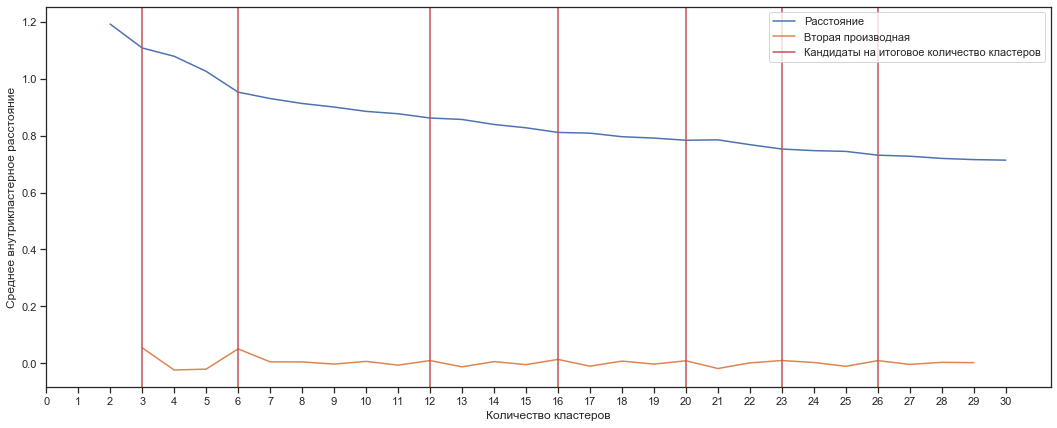

In [87]:
plt.figure(figsize=(18, 7))
idxs = np.arange(2, len(mean_dists) + 2)
plt.plot(idxs, mean_dists[::-1])

acceleration = np.diff(mean_dists[::-1], 2)  # 2nd derivative of the distances
plt.plot(idxs[:-2] + 1, acceleration)

for num_clust in (acceleration.argsort()[-7:][::-1] + 3).tolist():
    plt.axvline(num_clust, color='r')

plt.xlabel('Количество кластеров')
plt.ylabel('Среднее внутрикластерное расстояние')
plt.legend(("Расстояние", "Вторая производная", 'Кандидаты на итоговое количество кластеров'))
plt.xticks(np.arange(0,31,1))

plt.show()

In [88]:
num_hierarchical_clusters = 6
hierarchical_clusters = fcluster(Z, num_hierarchical_clusters, criterion='maxclust')

data['Кластер'] = pd.Series(hierarchical_clusters, index=data.index)
centers = data.groupby(['Кластер']).mean()
data = data.drop(columns=['Кластер'])
Kmean_clust = KMeans(n_clusters=num_hierarchical_clusters, init=centers, n_init=1).fit(data)
Kmeans_clusters = Kmean_clust.labels_ + 1
a = Kmeans_clusters - hierarchical_clusters
unique, counts = np.unique(a, return_counts=True)
trans_obj = data.shape[0] - dict(zip(unique, counts))[0]
print(trans_obj, 'объекта перешли в другой кластер после К-средних')
print('это', round(trans_obj*100 / data.shape[0], 2), '%')

73 объекта перешли в другой кластер после К-средних
это 15.53 %


In [89]:
data['Кластер'] = pd.Series(Kmeans_clusters, index=data.index)

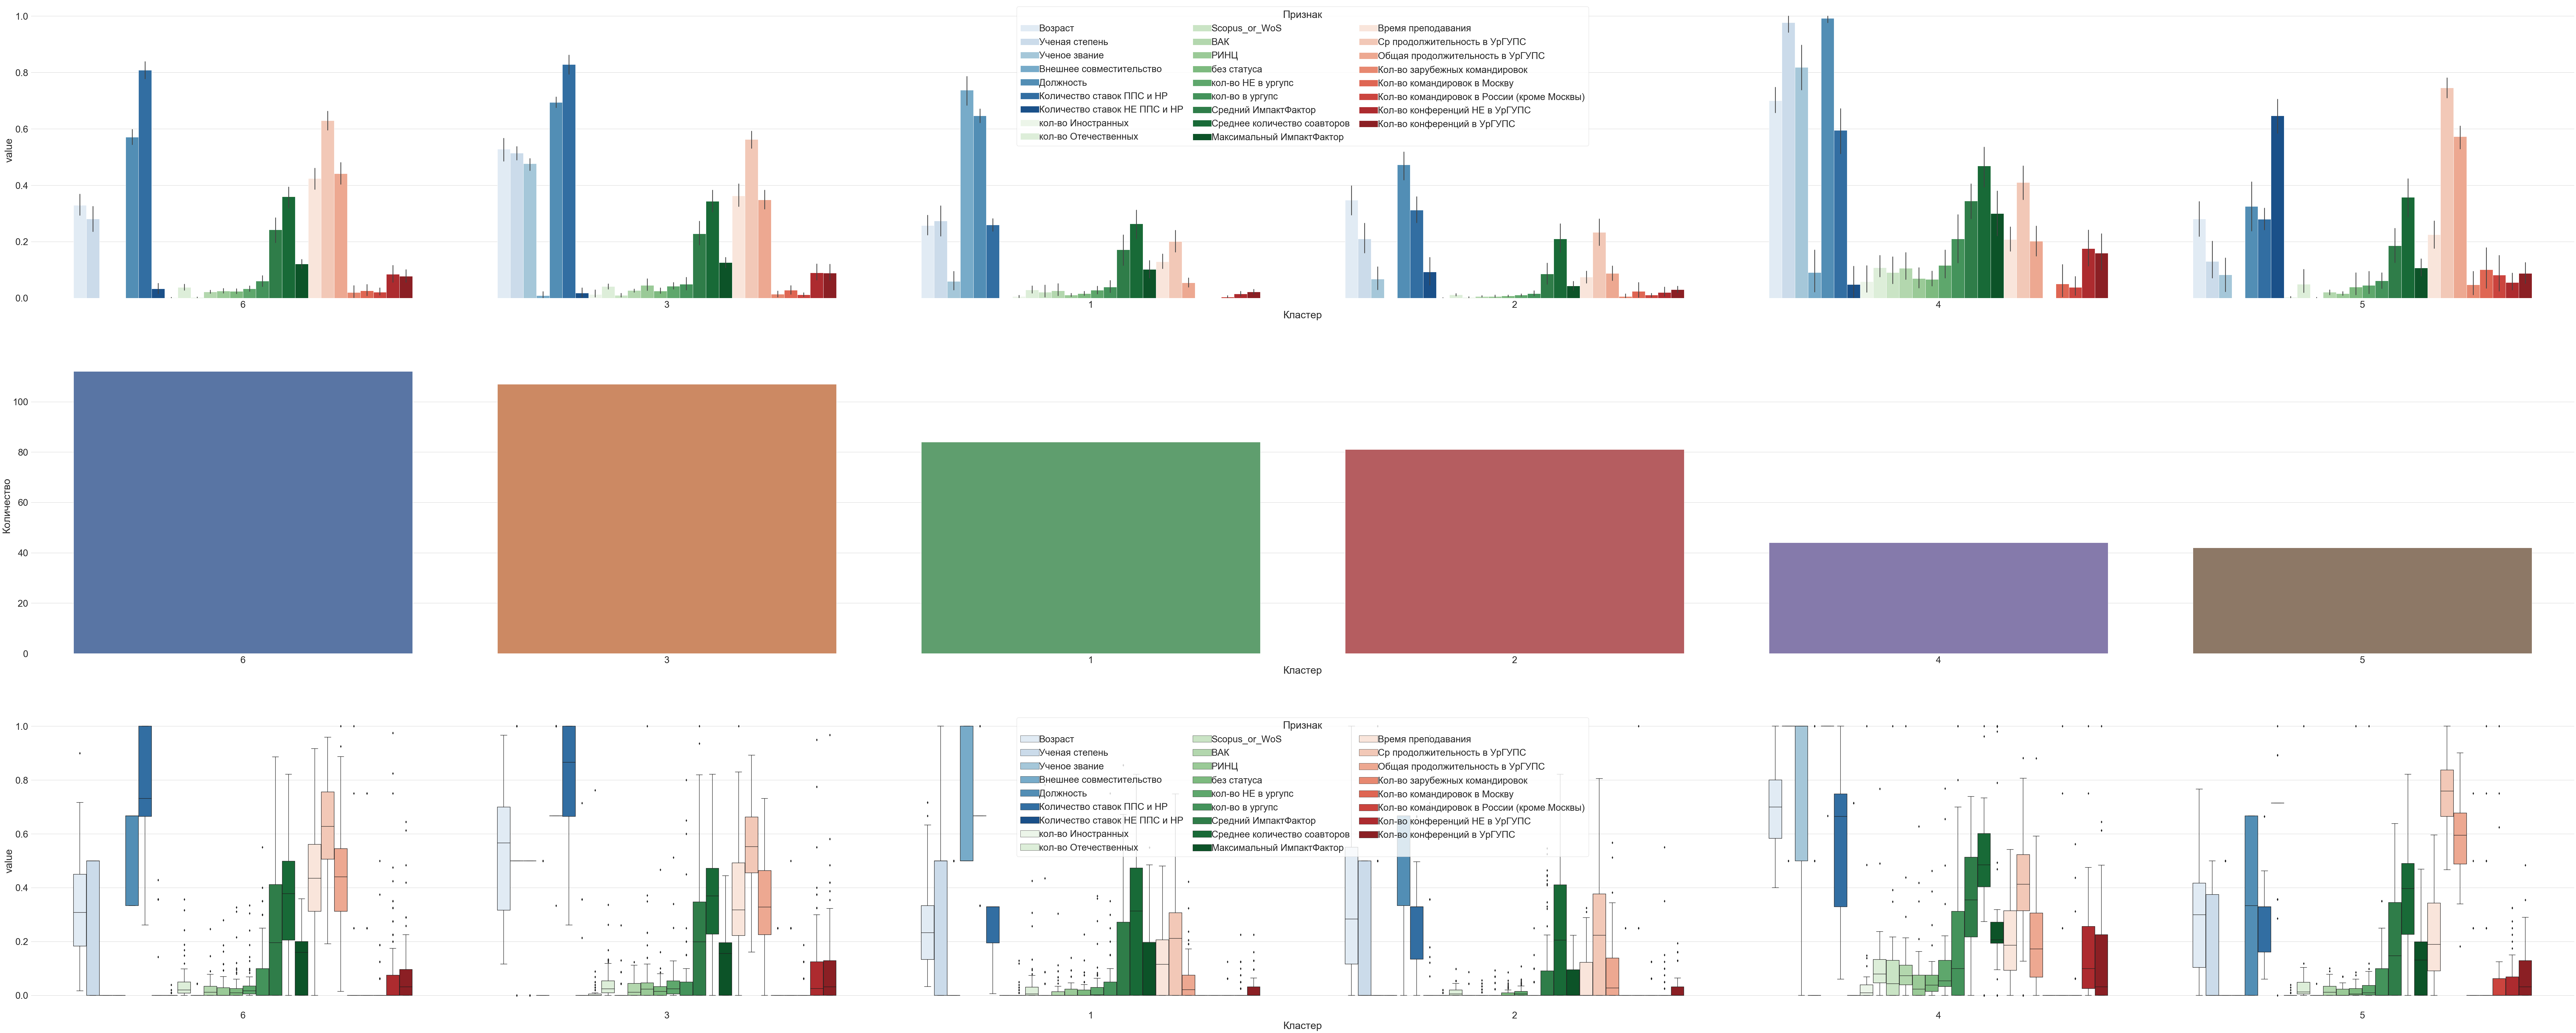

In [90]:
sns.set(style="whitegrid", font_scale=3)

# "Melt" the dataset to "long-form" or "tidy" representation
data_for_visual = pd.melt(data, "Кластер").sort_values(by=['Кластер']).reset_index(drop=True)#pd.melt(data_scaled, "Кластер")

# Initialize the figure
f, ax = plt.subplots(figsize=(160,65), nrows=3)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
#sns.stripplot(x="value", y="variable", hue="Кластер", data=data_for_visual, dodge=True, jitter=True, alpha=0.4, zorder=1)

features = data.columns[:-1].to_list()
colors = sns.color_palette("Blues", 7).as_hex() + sns.color_palette("Greens", 11).as_hex() + sns.color_palette("Reds", 8).as_hex()
dict_featue_color = dict(zip(features, colors))
sns.countplot(Kmeans_clusters, ax=ax[1], order=pd.Series(Kmeans_clusters).value_counts().index)
ax[1].set_xlabel('Кластер')
ax[1].set_ylabel('Количество')
sns.boxplot(x="Кластер", y="value", hue='variable', data=data_for_visual, hue_order=features, ax=ax[2], order=pd.Series(Kmeans_clusters).value_counts().index, palette=dict_featue_color)
sns.barplot(x="Кластер", y="value", hue='variable', data=data_for_visual, ci=95, hue_order=features, ax=ax[0], order=pd.Series(Kmeans_clusters).value_counts().index, palette=dict_featue_color)

# Show the conditional means
#sns.pointplot(x="value", y="variable", hue="Кластер", data=data_for_visual, dodge=.71, join=False, palette=None, markers="d", ci=None)

# Improve the legend 
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[:], labels[:], title="Признак",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=3, frameon=True)
handles, labels = ax[2].get_legend_handles_labels()
ax[2].legend(handles[:], labels[:], title="Признак",
          handletextpad=0, columnspacing=1,
          loc="best", ncol=3, frameon=True)

f.savefig('Визуализация кластеров статус', bbox_inches='tight')
sns.set(style="ticks", font_scale=1)